In [ ]:
print("hello")

In [1]:
##라이브러리 선언

from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

In [2]:
##호기별 데이터 값 불러오기
##생산량 천단위 값 제거

df3 = pd.read_excel('불량현황(6,7,25호기)(1).xlsx', sheet_name = '6호기', thousands = ',')
df4 = pd.read_excel('불량현황(6,7,25호기)(1).xlsx', sheet_name = '7호기', thousands = ',')
df5 = pd.read_excel('불량현황(6,7,25호기)(1).xlsx', sheet_name = '25호기', thousands = ',')

In [3]:
#파일 병합을 위한 drop 선언(원재료, 불량율 열 제거)

df3.drop(['원재료', '불량율'], axis = 1, inplace = True)
df3['year'] = pd.DatetimeIndex(df3['생산일자']).year
df3['month'] = pd.DatetimeIndex(df3['생산일자']).month
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   생산일자    258 non-null    object 
 1   설비명     258 non-null    object 
 2   품목군     254 non-null    object 
 3   금형코드    258 non-null    object 
 4   차수      258 non-null    int64  
 5   품목코드    258 non-null    object 
 6   품목정보    258 non-null    object 
 7   생산수량    258 non-null    int64  
 8   불량수량    248 non-null    float64
 9   색상      84 non-null     float64
 10  탄화      4 non-null      float64
 11  이물      210 non-null    float64
 12  성형      5 non-null      float64
 13  중량      0 non-null      float64
 14  긁힘      134 non-null    float64
 15  CRACK   176 non-null    float64
 16  흑점      225 non-null    float64
 17  수축      43 non-null     float64
 18  기포      155 non-null    float64
 19  초도      135 non-null    float64
 20  GAS     159 non-null    float64
 21  WELD    26 non-null     float64
 22  대기

In [4]:
df4.drop(['원재료', '불량율'], axis = 1, inplace = True)
df4['year'] = pd.DatetimeIndex(df4['생산일자']).year
df4['month'] = pd.DatetimeIndex(df4['생산일자']).month
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   생산일자    246 non-null    object 
 1   설비명     246 non-null    object 
 2   품목군     246 non-null    object 
 3   금형코드    246 non-null    object 
 4   차수      246 non-null    int64  
 5   품목코드    246 non-null    object 
 6   품목정보    246 non-null    object 
 7   생산수량    245 non-null    float64
 8   불량수량    243 non-null    float64
 9   색상      63 non-null     float64
 10  탄화      5 non-null      float64
 11  이물      228 non-null    float64
 12  성형      2 non-null      float64
 13  중량      0 non-null      float64
 14  긁힘      169 non-null    float64
 15  CRACK   111 non-null    float64
 16  흑점      237 non-null    float64
 17  수축      15 non-null     float64
 18  기포      211 non-null    float64
 19  초도      100 non-null    float64
 20  GAS     195 non-null    float64
 21  WELD    98 non-null     float64
 22  대기

In [5]:
df5.drop(['원재료', '불량율'], axis = 1, inplace = True)
df5['year'] = pd.DatetimeIndex(df5['생산일자']).year
df5['month'] = pd.DatetimeIndex(df5['생산일자']).month
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   생산일자    245 non-null    object 
 1   설비명     245 non-null    object 
 2   품목군     245 non-null    object 
 3   금형코드    245 non-null    object 
 4   차수      245 non-null    int64  
 5   품목코드    245 non-null    object 
 6   품목정보    245 non-null    object 
 7   생산수량    245 non-null    int64  
 8   불량수량    239 non-null    float64
 9   색상      135 non-null    float64
 10  탄화      14 non-null     float64
 11  이물      183 non-null    float64
 12  성형      31 non-null     float64
 13  중량      0 non-null      float64
 14  긁힘      118 non-null    float64
 15  CRACK   107 non-null    float64
 16  흑점      176 non-null    float64
 17  수축      31 non-null     float64
 18  기포      137 non-null    float64
 19  초도      139 non-null    float64
 20  GAS     181 non-null    float64
 21  WELD    49 non-null     float64
 22  대기

In [6]:
dp = pd.read_csv('data7(1).csv', encoding = 'utf-8', thousands = ',')
dp.drop(dp.tail(1).index,inplace=True)
dp.drop(['_', '_.1', '_.2', '_.3', '_.4', '_.5', '_.6', '_.7', '_.8',
         '_.9', '_.10', '_.11', '_.12', '_.13', '_.14', '_.15', '_.16',
         '_.17', '_.18', '_.19', '_.20', '_.21', '_.22', '_.23', '_.24',
         '_.25', '_.26', '_.27', '_.28', '_.29', '_.30'
        ], axis = 1, inplace = True)
dp.drop(['울아', '불량금액'], axis = 1, inplace = True)
dp['year'] = pd.DatetimeIndex(dp['생산일자']).year
dp['month'] = pd.DatetimeIndex(dp['생산일자']).month
dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 0 to 552
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   생산일자    553 non-null    object 
 1   설비명     553 non-null    object 
 2   품목군     553 non-null    object 
 3   금형코드    536 non-null    object 
 4   차수      553 non-null    float64
 5   품목코드    553 non-null    object 
 6   품목정보    553 non-null    object 
 7   생산수량    553 non-null    int64  
 8   불량수량    508 non-null    float64
 9   색상      109 non-null    float64
 10  탄화      20 non-null     float64
 11  이물      259 non-null    float64
 12  성형      11 non-null     float64
 13  중량      6 non-null      float64
 14  긁힘      129 non-null    float64
 15  CRACK   286 non-null    float64
 16  흑점      406 non-null    float64
 17  수축      62 non-null     float64
 18  기포      189 non-null    float64
 19  초도      234 non-null    float64
 20  GAS     323 non-null    float64
 21  WELD    155 non-null    float64
 22  대기

In [7]:
dp1 = pd.read_csv('data6(1).csv', encoding = 'utf-8', thousands = ',')
dp1.drop(dp1.tail(1).index,inplace=True)
dp1.drop(['_', '_.1', '_.2', '_.3', '_.4', '_.5', '_.6', '_.7', '_.8',
         '_.9', '_.10', '_.11', '_.12', '_.13', '_.14', '_.15', '_.16',
         '_.17', '_.18', '_.19', '_.20', '_.21', '_.22', '_.23', '_.24',
         '_.25', '_.26', '_.27', '_.28', '_.29', '_.30', '_.31'
         ], axis = 1, inplace = True)
dp1.drop(['불량금액'], axis = 1, inplace = True)
dp1['year'] = pd.DatetimeIndex(dp1['생산일자']).year
dp1['month'] = pd.DatetimeIndex(dp1['생산일자']).month
dp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   생산일자    300 non-null    object 
 1   설비명     300 non-null    object 
 2   품목군     300 non-null    object 
 3   금형코드    300 non-null    object 
 4   차수      300 non-null    float64
 5   품목코드    300 non-null    object 
 6   품목정보    300 non-null    object 
 7   생산수량    300 non-null    int64  
 8   불량수량    297 non-null    float64
 9   색상      54 non-null     float64
 10  탄화      14 non-null     float64
 11  이물      266 non-null    float64
 12  성형      10 non-null     float64
 13  중량      5 non-null      float64
 14  긁힘      32 non-null     float64
 15  CRACK   104 non-null    float64
 16  흑점      208 non-null    float64
 17  수축      16 non-null     float64
 18  기포      210 non-null    float64
 19  초도      60 non-null     float64
 20  GAS     258 non-null    float64
 21  WELD    11 non-null     float64
 22  대기

In [8]:
#데이터 병함

all = pd.concat([df3, df4, df5, dp, dp1])

In [9]:
all.reset_index(drop=True, inplace = True)

In [10]:
all.fillna(0, inplace = True)

In [11]:
all = all.astype({'생산수량':'float64', '불량수량':'float64'})

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


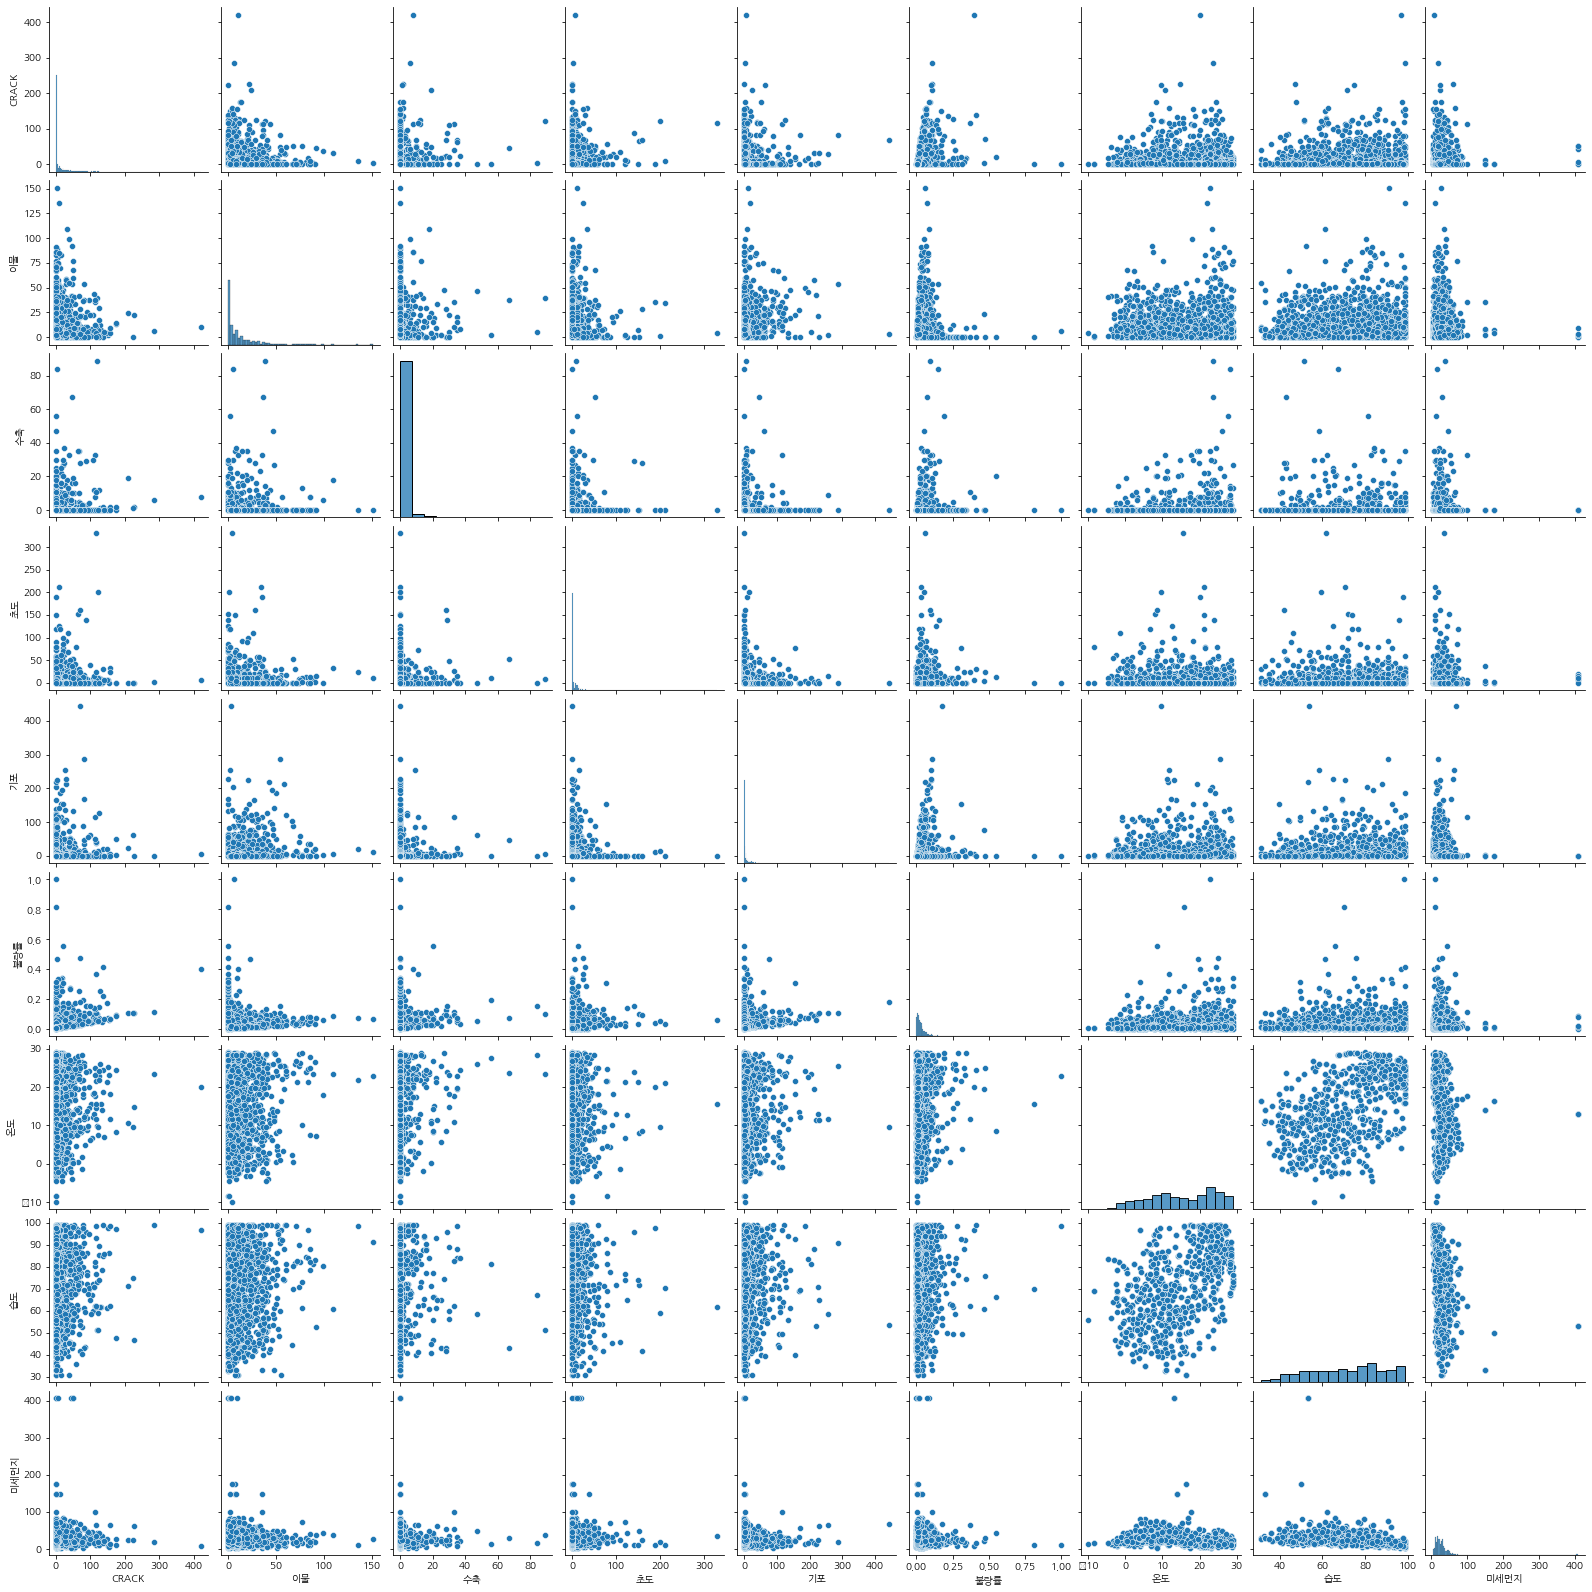

In [12]:
    #유의미한 변수와 불량률 간의 Regression

plt.rcParams['font.family'] = 'NanumGothic'
all['불량률'] = all['불량수량']/all['생산수량']
all.fillna(0, inplace = True)
sns.pairplot(all[["CRACK", "이물", "수축", "초도", "기포", "불량률", "온도", "습도", "대기질", "미세먼지"]])
plt.show()

In [13]:
test_df = all[["CRACK", "이물", "수축", "초도", "기포", "불량률", "온도", "습도", "대기질", "미세먼지"]]
corr = test_df.corr(method='pearson')
corr

,CRACK,이물,수축,초도,기포,불량률,온도,습도,미세먼지
CRACK,1.000000,0.033317,0.164210,0.121808,0.061746,0.312943,0.041597,0.069859,0.016773
이물,0.033317,1.000000,0.081951,0.019875,0.197522,0.006356,0.059293,0.070693,-0.051458
수축,0.164210,0.081951,1.000000,0.069586,0.013626,0.144903,0.095034,-0.011547,-0.002507
초도,0.121808,0.019875,0.069586,1.000000,-0.025756,0.110016,-0.002383,0.015200,0.012499
기포,0.061746,0.197522,0.013626,-0.025756,1.000000,0.140289,0.027263,0.035876,-0.031804
불량률,0.312943,0.006356,0.144903,0.110016,0.140289,1.000000,0.129617,0.098111,-0.037104
온도,0.041597,0.059293,0.095034,-0.002383,0.027263,0.129617,1.000000,0.526216,-0.151750
습도,0.069859,0.070693,-0.011547,0.015200,0.035876,0.098111,0.526216,1.000000,-0.280575
미세먼지,0.016773,-0.051458,-0.002507,0.012499,-0.031804,-0.037104,-0.151750,-0.280575,1.000000


In [14]:
#all['불량률'].isnull().values.any()
#all['온도'].isnull().values.any()

In [15]:
#dust_df = all[['불량률', '대기질']]
temp_df = all[['불량률', '온도']]
humid_df = all[['불량률', '습도']]
humid_df = all[['불량률', '미세먼지']]

In [16]:
#dust_df
#temp_df
#humid_df

In [17]:
dust_df = dust_df.astype({'대기질':'str'})

NameError: name 'dust_df' is not defined

In [18]:
#dust_df[dust_df['대기질'] == '매우나쁨']
#temp_df[temp_df['온도'] <= 5]
#humid_df[humid_df['습도'] < 55]

In [19]:
list1 = [] #매우나쁨
list2 = [] #나쁨
list3 = [] #보통
list4 = [] #좋음
list5 = [] #매우좋음

t_list1 = [] #낮음
t_list2 = [] #조금 낮음
t_list3 = [] #보통
t_list4 = [] #조금 높음
t_list5 = [] #높음

h_list1 = [] #낮음
h_list2 = [] #조금 낮음
h_list3 = [] #보통
h_list4 = [] #조금 높음
h_list5 = [] #높음

In [45]:
#대기질, 온도, 습도별 그룹 설정
#대기질: 매우나쁨/나쁨/보통/좋음/매우좋음
#온도: 5 이하/ 5 초과 10 이하 / 10 초과 20 이하 / 20 초과 25이하 / 25초과
#습도: 55 미만 / 55 이상 65 미만 / 65 이상 75 미만 / 75 이상 85 미만 / 85 이상

#list1 = dust_df[dust_df['대기질'] == '매우나쁨']['불량률'].to_list()
#list2 = dust_df[dust_df['대기질'] == '나쁨']['불량률'].to_list()
#list3 = dust_df[dust_df['대기질'] == '보통']['불량률'].to_list()
#list4 = dust_df[dust_df['대기질'] == '좋음']['불량률'].to_list()
#list5 = dust_df[dust_df['대기질'] == '매우좋음']['불량률'].to_list()

#t_list1 = temp_df[temp_df['온도'] <= 5]['불량률'].to_list()
#t_list2 = temp_df[(temp_df['온도'] > 5) & (temp_df['온도'] <= 10)]['불량률'].to_list()
#t_list3 = temp_df[(temp_df['온도'] > 10) & (temp_df['온도'] <= 15)]['불량률'].to_list()
#t_list4 = temp_df[(temp_df['온도'] > 15) & (temp_df['온도'] <= 25)]['불량률'].to_list()
#t_list5 = temp_df[temp_df['온도'] > 25]['불량률'].to_list()

#h_list1 = humid_df[humid_df['습도'] < 55]['불량률'].to_list()
#h_list2 = humid_df[(humid_df['습도'] >= 55) & (humid_df['습도'] < 65)]['불량률'].to_list()
#h_list3 = humid_df[(humid_df['습도'] >= 65) & (humid_df['습도'] < 75)]['불량률'].to_list()
#h_list4 = humid_df[(humid_df['습도'] >= 75) & (humid_df['습도'] < 85)]['불량률'].to_list()
#h_list5 = humid_df[humid_df['습도'] >= 85]['불량률'].to_list()

In [46]:
list = []
t_list = []
h_list = []

In [47]:
#double list를 통한 그룹 할당

list.append(list1)
list.append(list2)
list.append(list3)
list.append(list4)
list.append(list5)

t_list.append(t_list1)
t_list.append(t_list2)
t_list.append(t_list3)
t_list.append(t_list4)
t_list.append(t_list5)

h_list.append(h_list1)
h_list.append(h_list2)
h_list.append(h_list3)
h_list.append(h_list4)
h_list.append(h_list5)

In [48]:
#그룹별 데이터 수 측정

a = len(list1)
b = len(list2)
c = len(list3)
d = len(list4)
e = len(list5)

q = len(t_list1)
w = len(t_list2)
r = len(t_list3)
t = len(t_list4)
y = len(t_list5)

print(a, b ,c, d, e)
print(q, w, r, t, y)

0 0 0 0 0
0 0 0 0 0


In [49]:
#피어슨 상관계수 측정을 위한 불량률, 습도 추가

error_list = all['불량률'].to_list()
att1_list = all['수축'].to_list()
att2_list = all['초도'].to_list()
att3_list = all['기포'].to_list()
crack_list = all['CRACK'].to_list()
humid_list = all['습도'].to_list()
temp_list = all['온도'].to_list

In [50]:
from scipy import stats
from scipy.stats import bartlett

In [51]:
c = zip(h_list1,h_list2,h_list3,h_list4,h_list5)

In [52]:
correlation, p_value = stats.pearsonr(error_list, crack_list)
print(correlation, p_value)

0.3129433346377374 9.833684861225231e-38


In [53]:
correlation, p_value = stats.pearsonr(error_list, att1_list)
print(correlation, p_value)

0.14490327106216663 5.677217516323619e-09


In [54]:
correlation, p_value = stats.pearsonr(error_list, att2_list)
print(correlation, p_value)

0.11001631327127358 1.0177500247823228e-05


In [55]:
correlation, p_value = stats.pearsonr(error_list, att3_list)
print(correlation, p_value)

0.14028945240006072 1.714309775953536e-08


In [61]:
correlation, p_value = stats.pearsonr(error_list, temp_list)
print(correlation, p_value)

TypeError: object of type 'method' has no len()

In [62]:
correlation, p_value = stats.pearsonr(error_list, humid_list)
print(correlation, p_value)

0.09811120878516799 8.377787134960164e-05
